<a href="https://colab.research.google.com/github/sunspai1/ML_Code_Practise/blob/main/Universal_Code_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Base line Model for fashion mnist

from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [20]:
#load train & test dataset
def load_dataset():
  (trainX, trainY),(testX,testY) = fashion_mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))
  trainY= tensorflow.keras.utils.to_categorical(trainY, num_classes=None, dtype='float32')
  testY =  tensorflow.keras.utils.to_categorical(testY, num_classes=None, dtype='float32')
  return trainX, trainY, testX, testY

In [21]:
#Scale Pixels

def prep_pixels(train,test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  return train_norm, test_norm

In [22]:
#def CNN model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))

  opt = SGD(lr=0.01,momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [23]:
#Evaluate a model using k-fold cross validation

def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  #enumerate split
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()

    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> % 3f' %(acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [24]:
#Plot diagnostic curves:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')

    #plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange',label='test')
  pyplot.show()


In [25]:
# Summarize model performance

def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100, std(scores)*100, len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

In [26]:
# run the test harness for evaluating a model
def run_test_harnes():
  trainX, trainY, testX, testY = load_dataset()

  trainX, testX = prep_pixels(trainX, testX)

  scores,histories = evaluate_model(trainX, trainY)

  summarize_diagnostics(histories)

  summarize_performance(scores)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


>  91.091669
>  91.266668
>  90.791667
>  91.341668
>  91.125000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


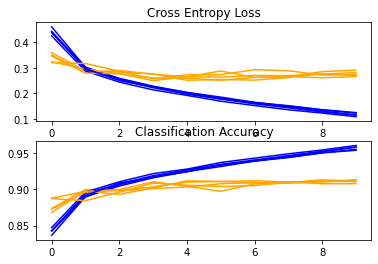

Accuracy: mean=91.123 std=0.189, n=5


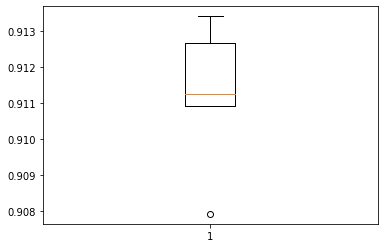

In [27]:
run_test_harnes()